<h1 align="center">Machine Vision (BCSE417P)</h1>

<p align="center"><strong>Submitted by:</strong></p>

<p align="center">Joel Antony James<br>(21BAI1369)</p>


Libraries Imported:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Loading Video For Processing:

In [2]:
vid = r"C:\Users\Joelk\Downloads\shrekMV.mp4"
cap = cv2.VideoCapture(vid)
if not cap.isOpened():
    print("Not opened")
else:
    print("Opened")

Opened


Frame Extraction Performed:

In [3]:
frames = []
fc = 0
while True:
    ret, f = cap.read()
    if not ret:
        break
    frames.append(f)
    fc+=1
cap.release()
print(f"{fc}")

150


Spatio-Temporal Segmentation

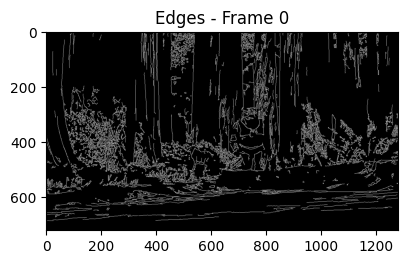

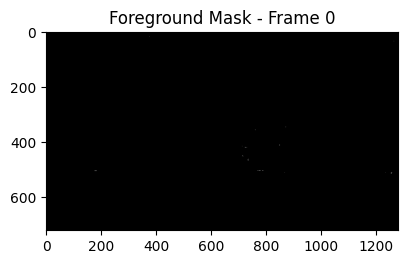

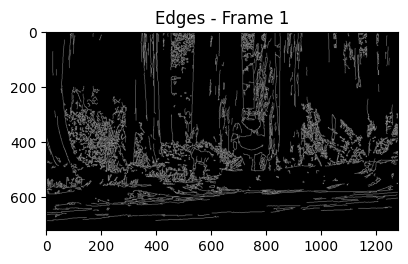

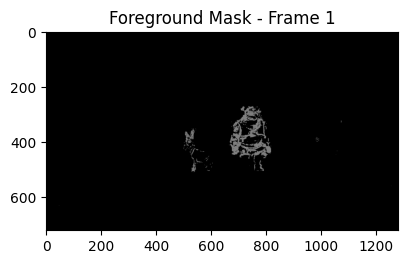

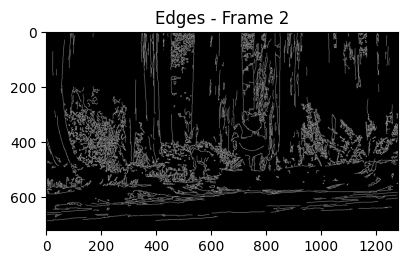

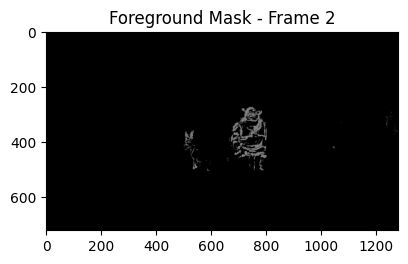

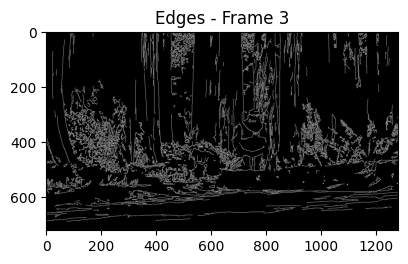

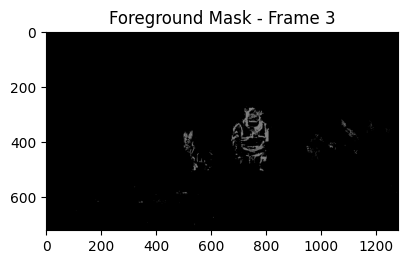

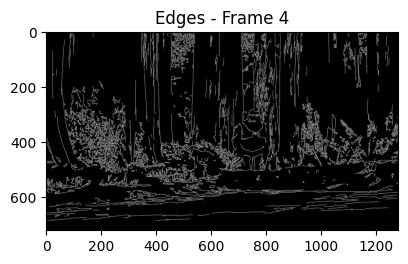

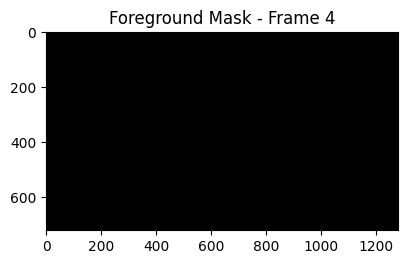

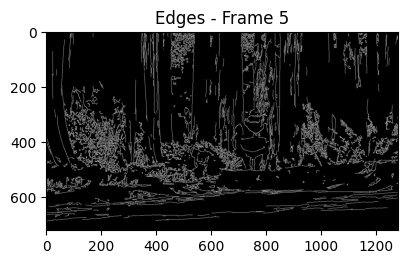

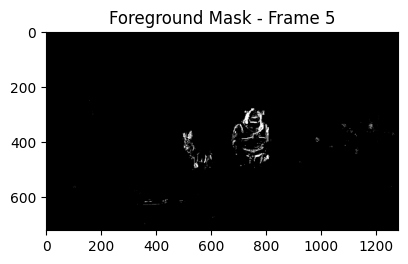

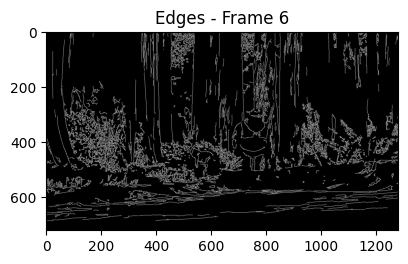

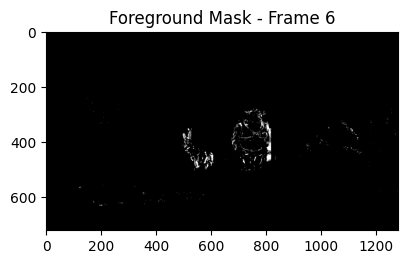

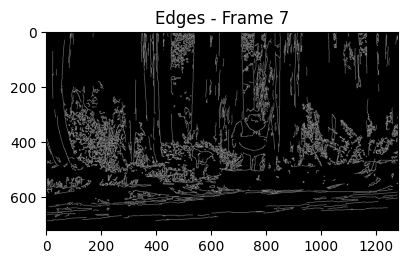

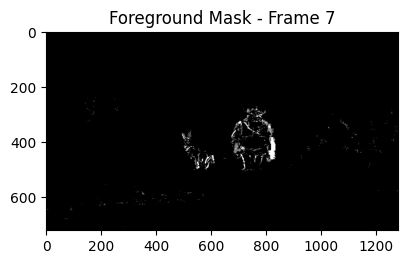

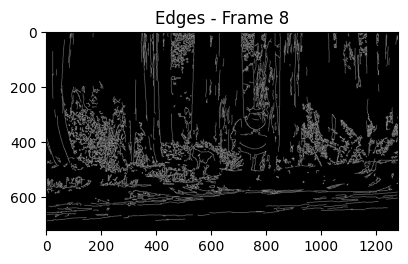

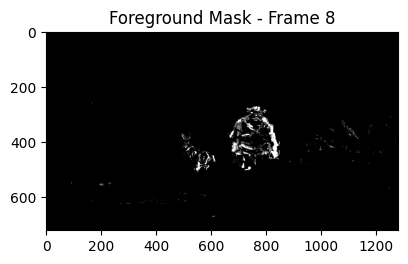

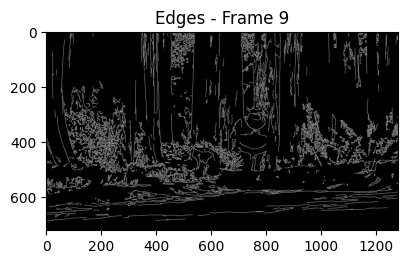

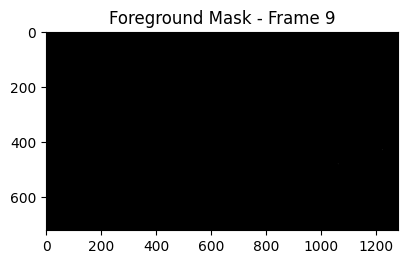

In [4]:
seg = []
bg = cv2.createBackgroundSubtractorMOG2()
for i, f in enumerate(frames):
    gr_f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    ed = cv2.Canny(gr_f, 50, 150)
    fg = bg.apply(f)
    seg.append((ed, fg))
for i in range(0,10):
    e, fm = seg[i]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Edges - Frame {i}')
    plt.imshow(e, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'Foreground Mask - Frame {i}')
    plt.imshow(fm, cmap='gray')

Scene Cut Detection

In [8]:
sc = []
prev = None
win = 10
diff = []
for i, f in enumerate(frames):
    hist = cv2.calcHist([f],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diff.append(d)
        if d>0.1:
            sc.append(('Hard Cut',i))
        if len(diff)>=win:
            avg = np.mean(diff[-win])
            if 0.3<avg<=0.5:
                sc.append(('Soft Cut', i-win // 2))
    else:
        diff.append(0)
    prev = hist
print("Scene cuts:")
for ct, fn in sc:
    print(f"{ct} at frame {fn}")


Scene cuts:


Opened


Text(0.5, 1.0, 'Diff bw consecutive frames')

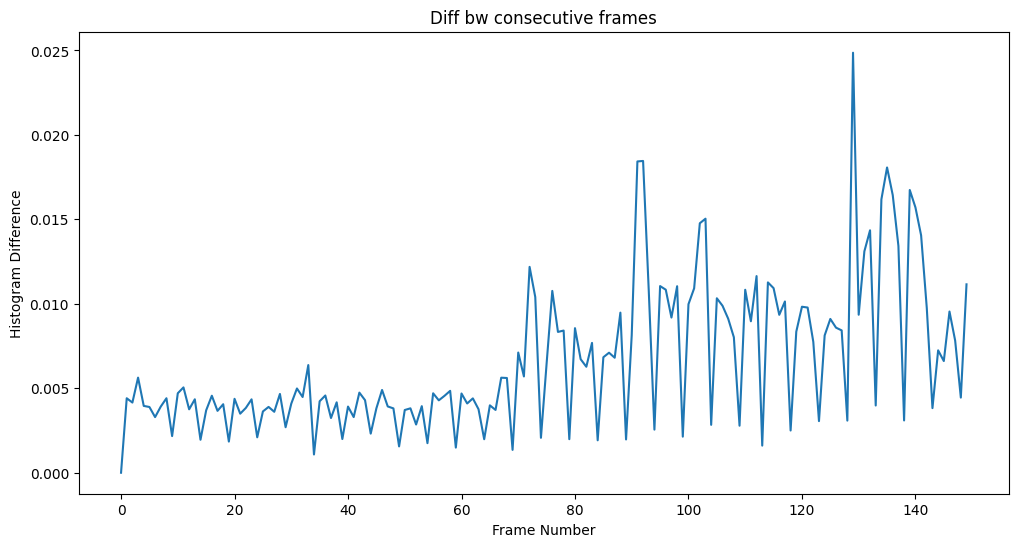

In [9]:
cap = cv2.VideoCapture(vid)

if not cap.isOpened():
    print("Not opened")
else:
    print("Opened")

fc = 0
prev = None
diff = []
while True:
    ret, f = cap.read()
    if not ret:
        break
    fc+=1
    gr = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gr],[0],None,[256],[0,256])
    hist = cv2.normalize(hist,hist).flatten()
    if prev is not None:
        d = cv2.compareHist(prev, hist, cv2.HISTCMP_BHATTACHARYYA)
        diff.append(d)
    else:
        diff.append(0)
    prev = hist
cap.release()
plt.figure(figsize=(12,6))
plt.plot(diff, label="Histogram Differences")
plt.xlabel("Frame Number")
plt.ylabel("Histogram Difference")
plt.title("Diff bw consecutive frames")

In [10]:
md = np.mean(diff)
std = np.std(diff)
hc = md + 2*std
sc = md + std
print(f"{hc:.3f}")
print(f"{sc:.3f}")

0.015
0.011


In [11]:
st = []
for i, d in enumerate(diff):
    if d>hc:
        st.append(('Hard Cut', i))
    elif sc < d < hc:
        st.append(('Soft Cut', i))
print("Scene cuts:")
for ct, fn in st:
    print(f"{ct} at frame {fn}")

Scene cuts:
Soft Cut at frame 72
Hard Cut at frame 91
Hard Cut at frame 92
Soft Cut at frame 95
Soft Cut at frame 98
Soft Cut at frame 101
Soft Cut at frame 102
Soft Cut at frame 103
Soft Cut at frame 112
Soft Cut at frame 114
Soft Cut at frame 115
Hard Cut at frame 129
Soft Cut at frame 131
Soft Cut at frame 132
Hard Cut at frame 134
Hard Cut at frame 135
Hard Cut at frame 136
Soft Cut at frame 137
Hard Cut at frame 139
Hard Cut at frame 140
Soft Cut at frame 141
Soft Cut at frame 149


Mark the Scene cuts:

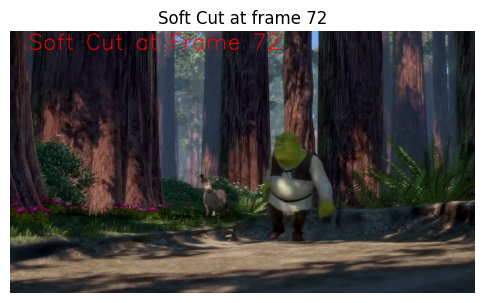

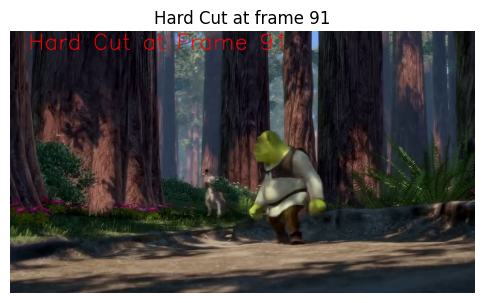

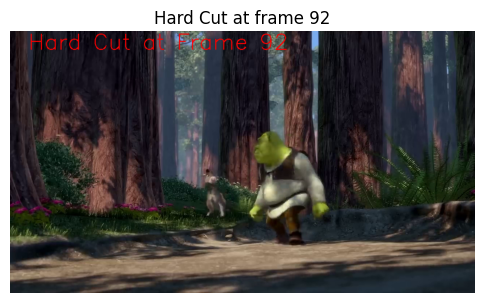

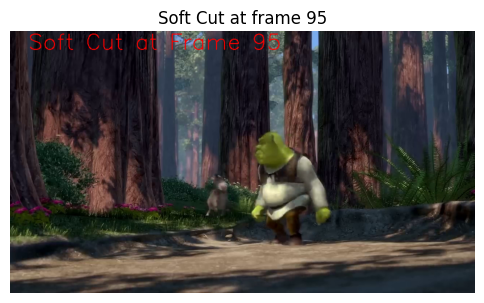

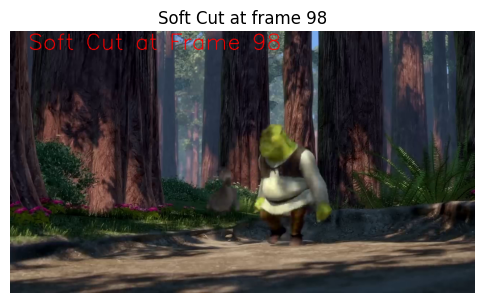

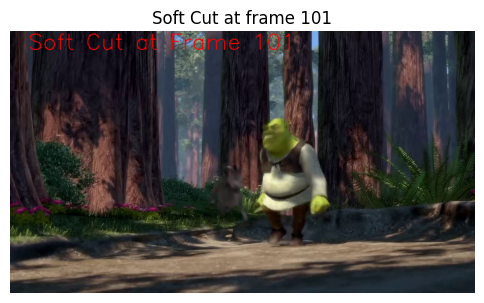

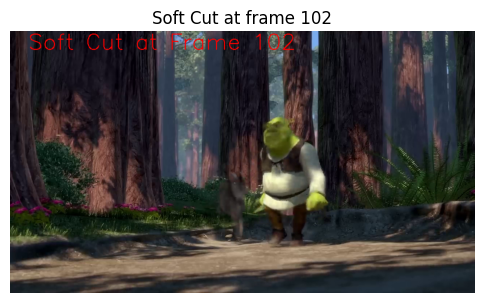

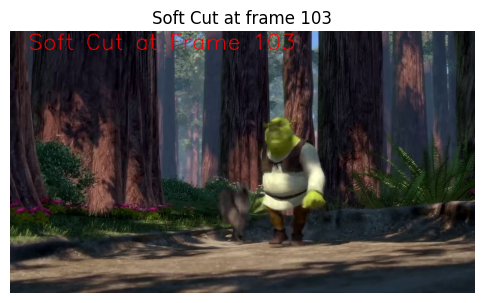

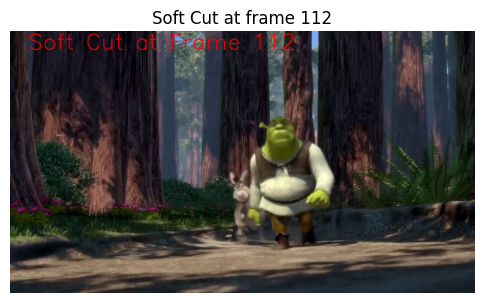

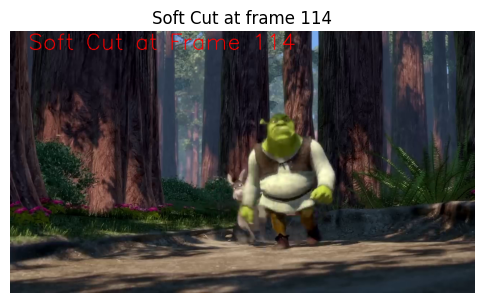

In [12]:
cap = cv2.VideoCapture(vid)
fwc = []
fi = 0
while True:
    ret, f = cap.read()
    if not ret:
        break
    for ct, cf in st:
        if fi==cf:
            af = f.copy()
            cv2.putText(af, f"{ct} at Frame {fi}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255),2)
            fwc.append((af, ct, fi))
            break
    fi+=1
cap.release()

for af, ct, fi in fwc[0:10]:
    plt.figure(figsize=(6,4))
    plt.title(f"{ct} at frame {fi}")
    plt.imshow(cv2.cvtColor(af, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Results

Soft Cut
Hard Cut
Hard Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut
Soft Cut


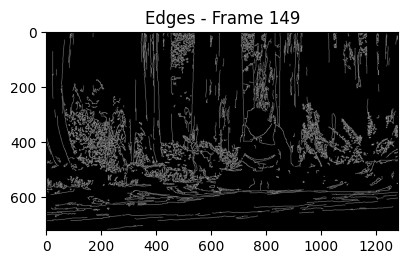

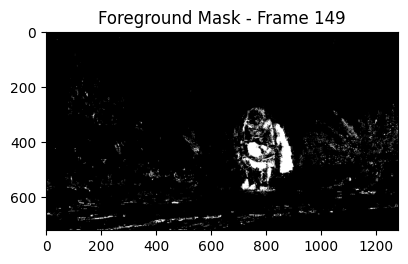

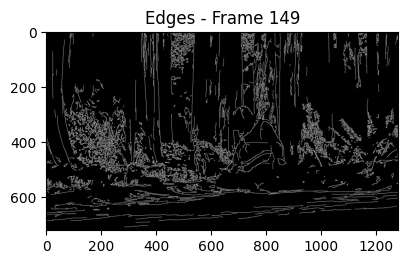

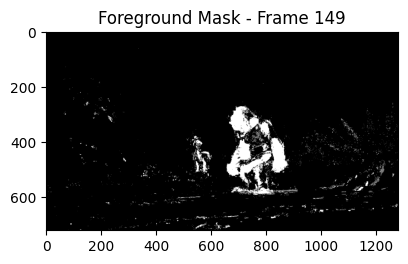

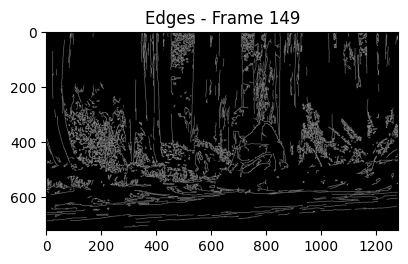

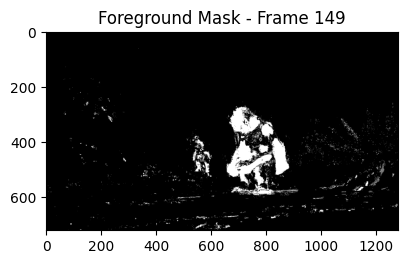

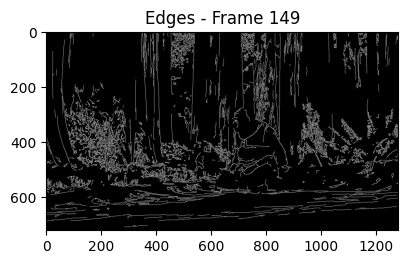

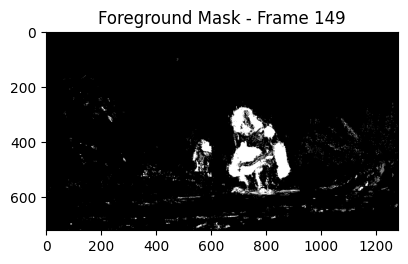

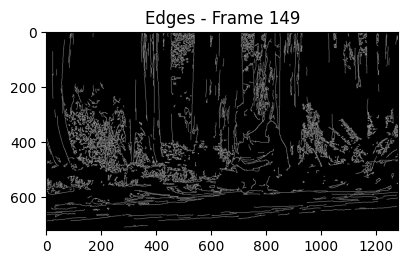

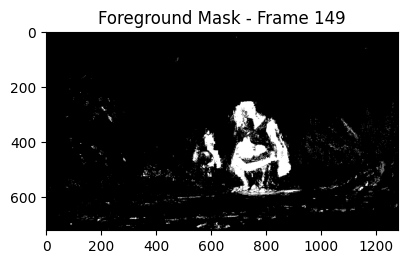

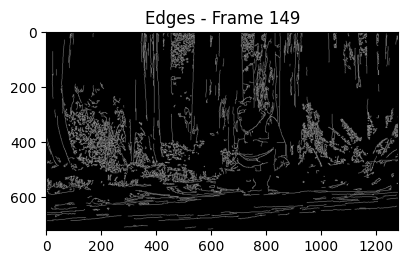

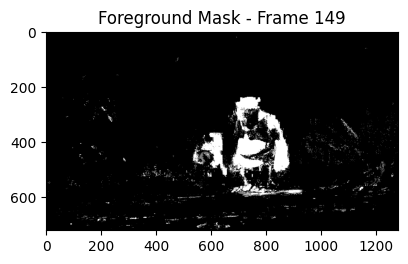

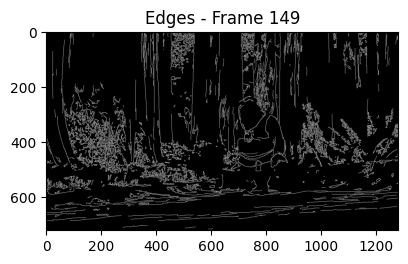

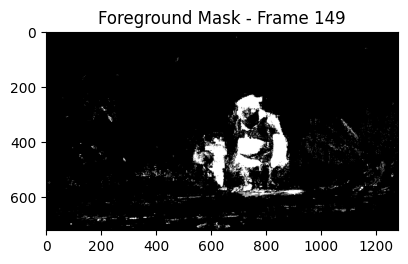

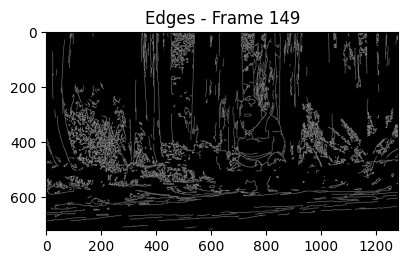

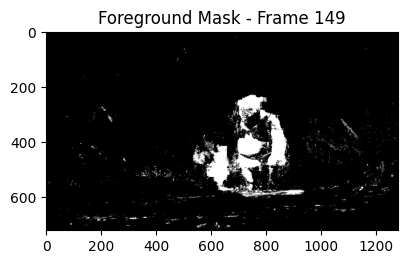

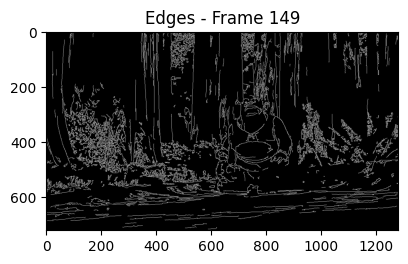

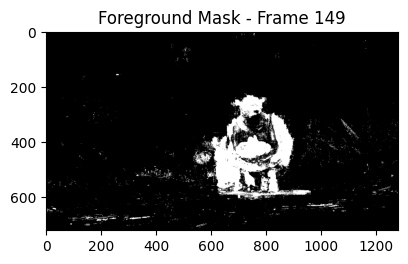

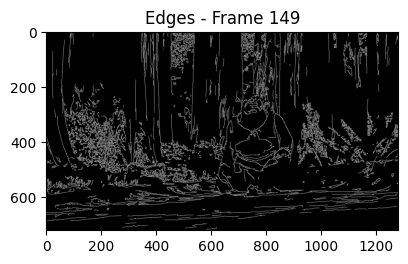

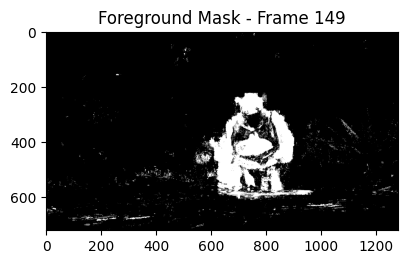

In [13]:
for af, ct, fi in fwc[:10]:
    ed, fm = seg[fi]
    print(f"{ct}")
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f'Edges - Frame {i}')
    plt.imshow(ed, cmap='gray')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,2)
    plt.title(f'Foreground Mask - Frame {i}')
    plt.imshow(fm, cmap='gray')